In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

breast_cancer = load_breast_cancer()

features = breast_cancer.data
target = breast_cancer.target

train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.33)

dtr = DecisionTreeClassifier()

dtr.fit(train_features, train_target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

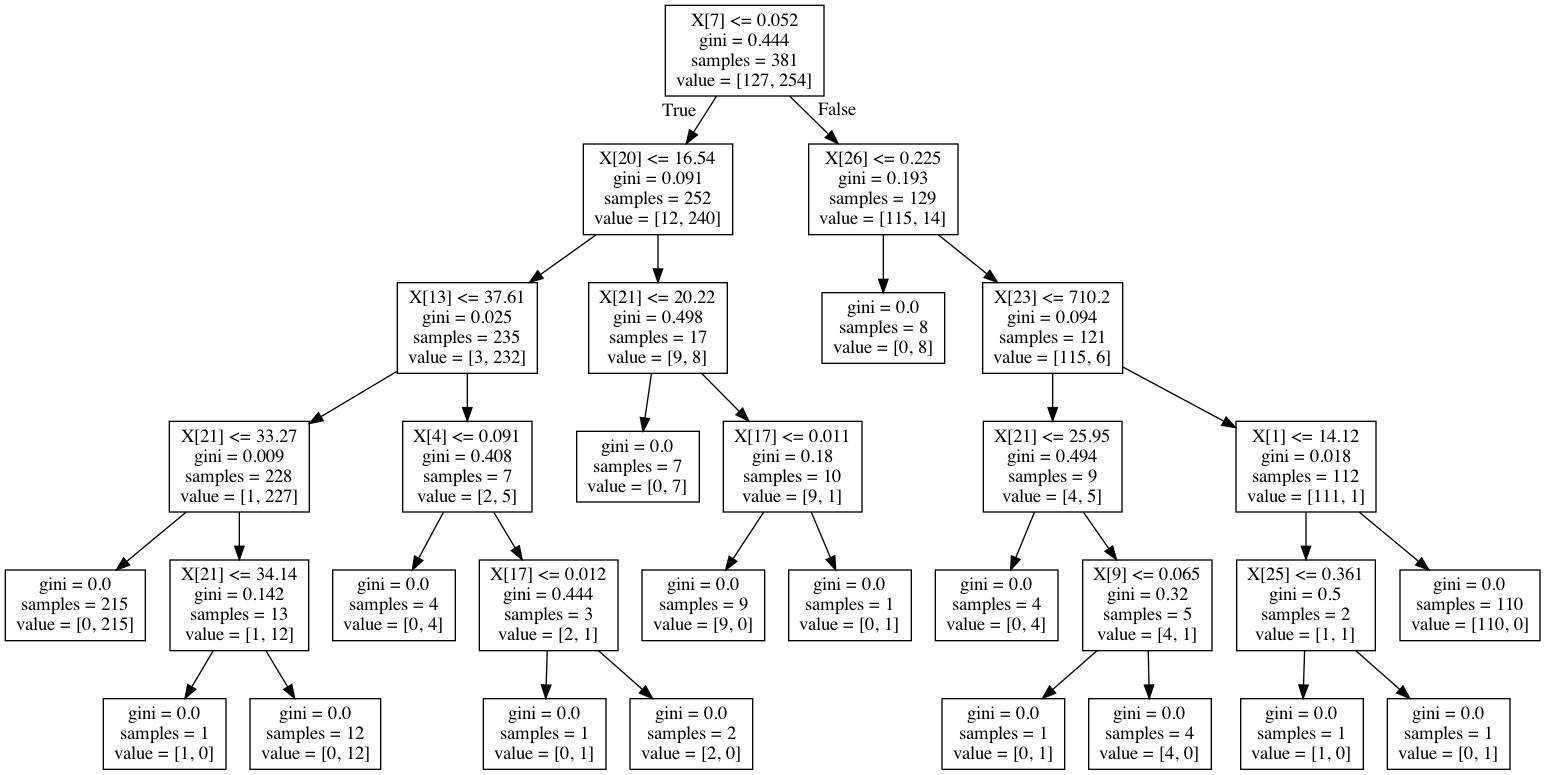

In [2]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(dtr)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png()) 

In [6]:
d = dict()
a = dtr.tree_.feature
for item in a:
    try:
        d[item]+=1
    except KeyError:
        d[item]=1
d.pop(-2)
print(d)

{7: 1, 20: 1, 13: 1, 21: 4, 4: 1, 17: 2, 26: 1, 23: 1, 9: 1, 1: 1, 25: 1}


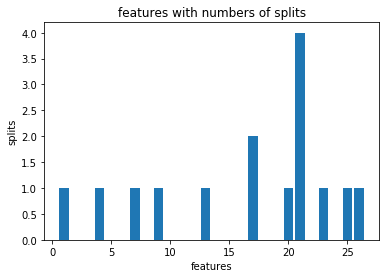

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
x=list(d.keys())
y=list(d.values())
plt.bar(x,y)
plt.xlabel('features')
plt.ylabel('splits')
plt.title('features with numbers of splits')
plt.show()